In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md

In [45]:
pd.read_csv('raw_data/Usernames - Sheet1.csv')

,@saylor
0,@icebergy_
1,@LSDinmycoffee
2,@Crypto_Chase
3,@Anbessa100
4,@jebus911
...,...
98,@kerneltrader
99,@jimtalbot
100,@PeterLBrandt
101,@TraderKoz


In [53]:
raw_df = pd.read_csv('raw_data/cleaned_tweets_without_dupes_120323.csv',lineterminator='\n')
# raw_df = pd.read_csv('raw_data/raw_tweets_without_dupes_120323.csv', lineterminator='\n')
raw_df

,Unnamed: 0,datetime,username,text,date,negative_bert,neutral_bert,positive_bert
0,0,2021-01-01 22:09:59+00:00,sivilianlife,What's the chances @Grayscale is hedging short...,2021-01-01,0.002040,0.951312,0.046648
1,1,2021-01-01 22:09:39+00:00,LudicrousSpeed9,@CNBC Buy #Bitcoin to hedge against the result...,2021-01-01,0.004157,0.400750,0.595093
2,2,2021-01-01 22:09:35+00:00,SergioBowers1,@APompliano @pepsi @MonsterEnergy $DEO $KO e...,2021-01-01,0.000248,0.582107,0.417644
3,3,2021-01-01 22:09:21+00:00,bitvestor,Closed another chunk of this long now. Remaind...,2021-01-01,0.000974,0.807066,0.191960
4,4,2021-01-01 22:09:18+00:00,FROMKAIWITHLOVE,When you dig deeper into #kardiachain company ...,2021-01-01,0.000056,0.223449,0.776495
...,...,...,...,...,...,...,...,...
347663,347663,2023-03-09 06:00:01+00:00,HourlyBTCUpdate,Bitcoin: $21739.58\n💔 -1.72 last 1 Hour (-0.01...,2023-03-09,0.001016,0.870834,0.128149
347664,347664,2023-03-09 06:00:01+00:00,Mannny23,Popular crypto latest prices:\n $BTC 21751.00\...,2023-03-09,0.003519,0.907121,0.089360
347665,347665,2023-03-09 06:00:01+00:00,whalesradar_com,#CTXCUSDT #CTXC \nSignal #4 \n\nLast Signal: ...,2023-03-09,0.000521,0.964454,0.035024
347666,347666,2023-03-09 06:00:00+00:00,croxroadnews,The Wings of #Bitcoin: A Symbol of Strength an...,2023-03-09,0.007388,0.532228,0.460384


In [54]:
df = raw_df.drop('Unnamed: 0',axis=1)
df

,datetime,username,text,date,negative_bert,neutral_bert,positive_bert
0,2021-01-01 22:09:59+00:00,sivilianlife,What's the chances @Grayscale is hedging short...,2021-01-01,0.002040,0.951312,0.046648
1,2021-01-01 22:09:39+00:00,LudicrousSpeed9,@CNBC Buy #Bitcoin to hedge against the result...,2021-01-01,0.004157,0.400750,0.595093
2,2021-01-01 22:09:35+00:00,SergioBowers1,@APompliano @pepsi @MonsterEnergy $DEO $KO e...,2021-01-01,0.000248,0.582107,0.417644
3,2021-01-01 22:09:21+00:00,bitvestor,Closed another chunk of this long now. Remaind...,2021-01-01,0.000974,0.807066,0.191960
4,2021-01-01 22:09:18+00:00,FROMKAIWITHLOVE,When you dig deeper into #kardiachain company ...,2021-01-01,0.000056,0.223449,0.776495
...,...,...,...,...,...,...,...
347663,2023-03-09 06:00:01+00:00,HourlyBTCUpdate,Bitcoin: $21739.58\n💔 -1.72 last 1 Hour (-0.01...,2023-03-09,0.001016,0.870834,0.128149
347664,2023-03-09 06:00:01+00:00,Mannny23,Popular crypto latest prices:\n $BTC 21751.00\...,2023-03-09,0.003519,0.907121,0.089360
347665,2023-03-09 06:00:01+00:00,whalesradar_com,#CTXCUSDT #CTXC \nSignal #4 \n\nLast Signal: ...,2023-03-09,0.000521,0.964454,0.035024
347666,2023-03-09 06:00:00+00:00,croxroadnews,The Wings of #Bitcoin: A Symbol of Strength an...,2023-03-09,0.007388,0.532228,0.460384


In [49]:
def data_prep(df,btc):
    
    X = df[['date']]
    X['date'] = pd.to_datetime(X['date'])
    btc['date'] = pd.to_datetime(btc['Date'])
    
    X['Daily_Average_Sentiment']=df['positive_bert']/df.iloc[:,1:].sum(axis=1)
    
    
    X['MA20_Sentiment'] = X['Daily_Average_Sentiment'].rolling(window=21).mean()
    X['MA50_Sentiment'] = X['Daily_Average_Sentiment'].rolling(window=51).mean()
    
    X['Threshold_50'] = X['Daily_Average_Sentiment']>X['MA50_Sentiment']
    X['Threshold_20'] = X['Daily_Average_Sentiment']>X['MA20_Sentiment']
    X['Buy_Sell'] = X['Threshold_50'] & X['Threshold_20']
    
    NX = X.merge(btc,how='inner',on='date')
    NNX= NX[['date','Daily_Average_Sentiment', 'MA50_Sentiment','MA20_Sentiment','Threshold_50','Threshold_20',
             'Buy_Sell','Adj Close']]
    
    return NNX

In [50]:
btc = pd.read_csv("raw_data/2020-03-10_2023-03-10_BTC-USD_1d.csv")
btest = btc.copy()

In [51]:
btest

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,price_change
0,2020-03-10,7922.146973,8136.945312,7814.763184,7909.729492,7909.729492,42213940994,BTC-USD,NaN
1,2020-03-11,7910.089844,7950.814453,7642.812500,7911.430176,7911.430176,38682762605,BTC-USD,0.000215
2,2020-03-12,7913.616211,7929.116211,4860.354004,4970.788086,4970.788086,53980357243,BTC-USD,-0.371695
3,2020-03-13,5017.831055,5838.114746,4106.980957,5563.707031,5563.707031,74156772075,BTC-USD,0.119281
4,2020-03-14,5573.077637,5625.226562,5125.069336,5200.366211,5200.366211,36154506008,BTC-USD,-0.065306
...,...,...,...,...,...,...,...,...,...
1090,2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,22435.513672,13317001733,BTC-USD,0.003676
1091,2023-03-06,22436.816406,22584.292969,22331.314453,22429.757812,22429.757812,17353192895,BTC-USD,-0.000257
1092,2023-03-07,22428.322266,22527.417969,22011.261719,22219.769531,22219.769531,22765452204,BTC-USD,-0.009362
1093,2023-03-08,22216.441406,22268.896484,21708.050781,21718.080078,21718.080078,22536575684,BTC-USD,-0.022579


In [68]:
X = data_prep(df,btest)
X

/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = pd.to_datetime(X['date'])
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X['Daily_Average_Sentiment']=df['positive_bert']/df.iloc[:,1:].sum(axis=1)
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,date,Daily_Average_Sentiment,MA50_Sentiment,MA20_Sentiment,Threshold_50,Threshold_20,Buy_Sell,Adj Close
0,2021-01-01,0.046648,NaN,NaN,False,False,False,29374.152344
1,2021-01-01,0.595093,NaN,NaN,False,False,False,29374.152344
2,2021-01-01,0.417644,NaN,NaN,False,False,False,29374.152344
3,2021-01-01,0.191960,NaN,NaN,False,False,False,29374.152344
4,2021-01-01,0.776495,NaN,NaN,False,False,False,29374.152344
...,...,...,...,...,...,...,...,...
347663,2023-03-09,0.128149,0.297910,0.204301,False,False,False,20363.021484
347664,2023-03-09,0.089360,0.288935,0.180267,False,False,False,20363.021484
347665,2023-03-09,0.035024,0.284339,0.180654,False,False,False,20363.021484
347666,2023-03-09,0.460384,0.291679,0.194945,True,True,True,20363.021484


In [87]:
vol_data = pd.read_csv('~/Code/giadapi/crypto/complete_vol_2023-03-14.csv',lineterminator='\n',index_col=0)
vol_data

,date,negative_bert,neutral_bert,positive_bert,daily_tweets,MA7_Sentiment,MA20_Sentiment,MA50_Sentiment,BTC_price,BTC_trading_volume
0,2021-01-01,0.085275,0.489181,0.425545,12561.859509,NaN,NaN,NaN,29374.152344,4.073030e+10
1,2021-01-02,0.143365,0.439075,0.417560,30124.352145,NaN,NaN,NaN,32127.267578,6.786542e+10
2,2021-01-03,0.148220,0.432023,0.419757,26167.331282,NaN,NaN,NaN,32782.023438,7.866524e+10
3,2021-01-04,0.101558,0.507526,0.390916,18041.199084,NaN,NaN,NaN,31971.914062,8.116348e+10
4,2021-01-05,0.088530,0.517456,0.394014,17473.551568,NaN,NaN,NaN,33992.429688,6.754732e+10
...,...,...,...,...,...,...,...,...,...,...
799,2023-03-11,0.118417,0.483141,0.398441,21168.432091,0.371627,0.359184,0.362839,20632.410156,3.018029e+10
800,2023-03-12,0.137051,0.479557,0.383392,18621.077853,0.372813,0.359771,0.362830,22163.949219,2.927904e+10
801,2023-03-13,0.126823,0.496415,0.376762,24769.727538,0.375752,0.360913,0.362850,24197.533203,4.946636e+10
802,2023-03-14,0.101771,0.503114,0.395115,45600.116185,0.378136,0.363325,0.363191,24746.074219,5.462223e+10


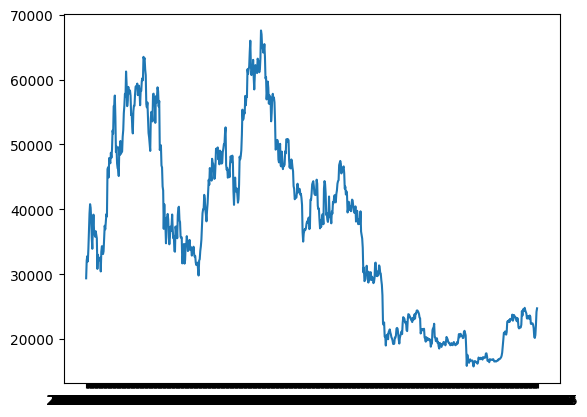

In [90]:
plt.plot(vol_data['date'],vol_data['BTC_price'])

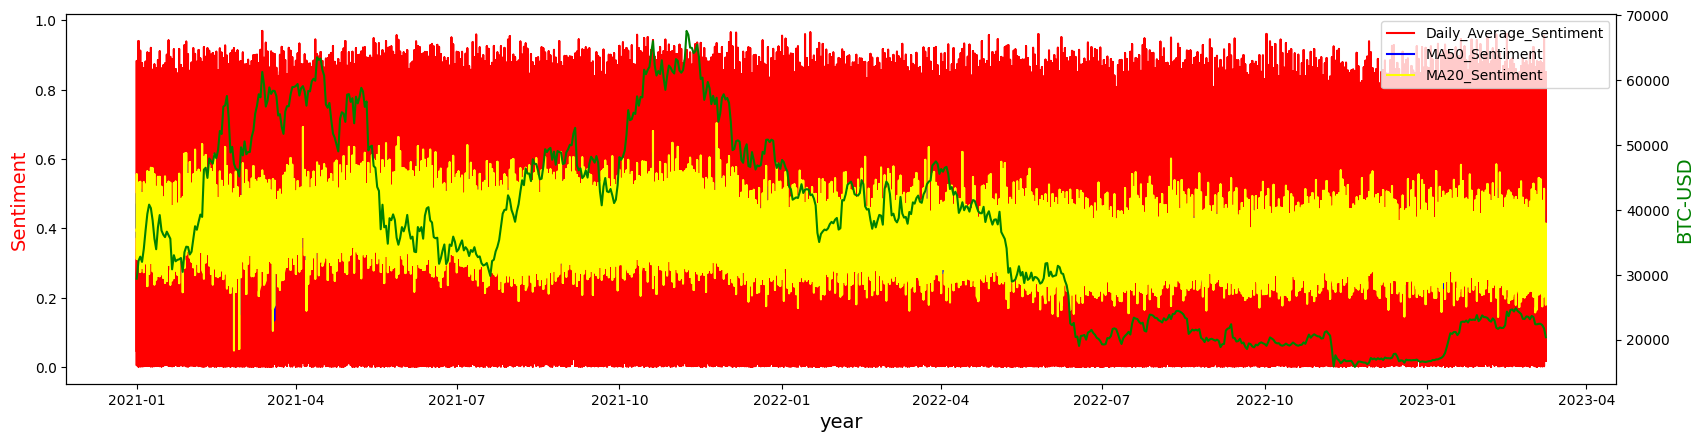

In [77]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(X['date'],X['Daily_Average_Sentiment'],color="red",label='Daily_Average_Sentiment')
ax.plot(X['date'],X['MA50_Sentiment'],color="blue",label='MA50_Sentiment')
ax.plot(X['date'],X['MA20_Sentiment'],color="yellow",label='MA20_Sentiment')
# set x-axis label
ax.set_xlabel("year", fontsize = 14)
# set y-axis label
ax.set_ylabel("Sentiment",color="red",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(X['date'],X['Adj Close'],color="green")
ax2.set_ylabel("BTC-USD",color="green",fontsize=14)


ax.legend()
fig.set_figwidth(20)
plt.show()

# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

In [11]:
buy = X.columns.get_loc("Buy_Sell")
X.iloc[1,buy]

False

In [91]:
def baseline_strat(Y,total_amt=1000,daily_amt = 100,start_btc=0):
    X = Y.copy()
    X['bitcoin_held']=start_btc
    X['cash_held']= total_amt
    btc = X.columns.get_loc("Adj Close")
    buy = X.columns.get_loc("Buy_Sell")
    btc_held = X.columns.get_loc("bitcoin_held")
    cash_held = X.columns.get_loc("cash_held")

    for i in range(len(X)): 
        if X.iloc[i,buy]:
            X.iloc[i,btc_held] = X.iloc[i-1,btc_held] + daily_amt/X.iloc[i,btc]
            X.iloc[i,cash_held] = X.iloc[i-1,cash_held] - daily_amt
        else:
            X.iloc[i,cash_held] = X.iloc[i-1,btc_held]*X.iloc[i,btc] + X.iloc[i-1,cash_held]
    #         X.iloc[i,btc_held] = 0

    X['equity_held'] = X['bitcoin_held']*X['Adj Close']+X['cash_held']
    return X
    

/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = pd.to_datetime(X['date'])
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X['Daily_Average_Sentiment']=df['positive_bert']/df.iloc[:,1:].sum(axis=1)
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

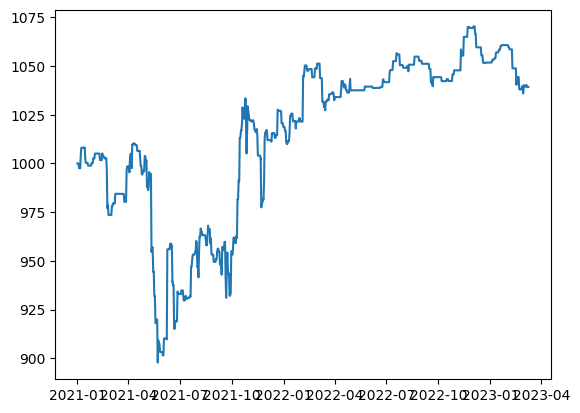

In [82]:
A = data_prep(df,btest)
X = baseline_strat(X,total_amt=1000,daily_amt=100)

plt.plot(X['date'],X['equity_held'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


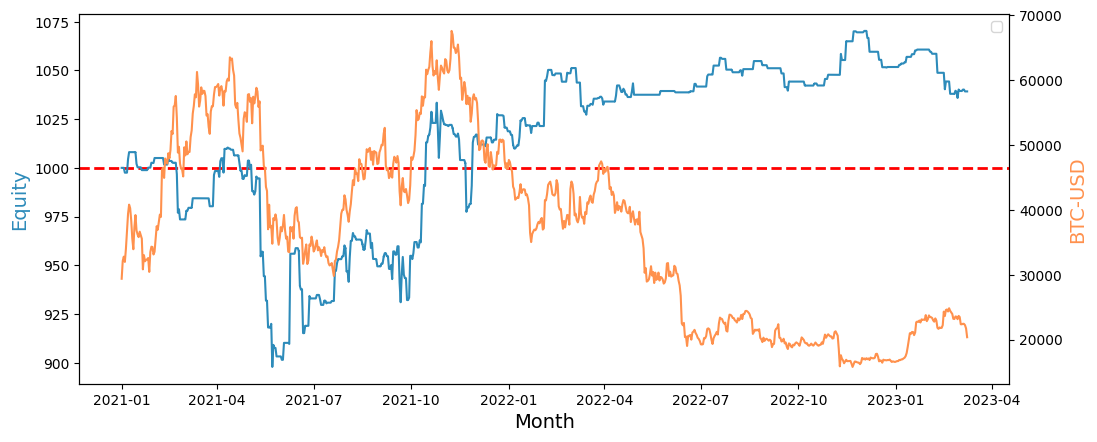

In [121]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
# ax.plot(X['date'],X['Daily_Average_Sentiment'],color="red",label='Daily_Average_Sentiment')
# ax.plot(X['date'],X['MA50_Sentiment'],color="blue",label='MA50_Sentiment')
# ax.plot(X['date'],X['MA20_Sentiment'],color="yellow",label='MA20_Sentiment')
ax.plot(X['date'],X['equity_held'],color='#2D8BBA')
# set x-axis label
ax.set_xlabel("Month", fontsize = 14)
# set y-axis label
ax.set_ylabel("Equity",color="#2D8BBA",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(X['date'],X['Adj Close'],color="#FF914D")
ax2.set_ylabel("BTC-USD",color='#FF914D',fontsize=14)

ax.axhline(y=1000, c="r", linestyle='--',linewidth=2, zorder=0)


ax.legend()
fig.set_figwidth(12)
# fig.set_figheight(12)
plt.show()

## Per day strat

In [98]:
def baseline_strat_per_day(Y,total_amt=1000,daily_amt = 100,start_btc=0):
    X = Y.copy()
    X['bitcoin_held']=start_btc
    X['cash_held']= total_amt
    
    X['Threshold_50'] = X['positive_bert']>X['MA50_Sentiment']
    X['Threshold_20'] = X['positive_bert']>X['MA20_Sentiment']
    X['Buy_Sell'] = X['Threshold_50'] & X['Threshold_20']
    
    btc = X.columns.get_loc("BTC_price")
    buy = X.columns.get_loc("Buy_Sell")
    btc_held = X.columns.get_loc("bitcoin_held")
    cash_held = X.columns.get_loc("cash_held")
    
    
    for i in range(len(X)): 
        if X.iloc[i,buy]:
            X.iloc[i,btc_held] = X.iloc[i-1,btc_held] + daily_amt/X.iloc[i,btc]
            X.iloc[i,cash_held] = X.iloc[i-1,cash_held] - daily_amt
        else:
            X.iloc[i,cash_held] = X.iloc[i-1,btc_held]*X.iloc[i,btc] + X.iloc[i-1,cash_held]
    #         X.iloc[i,btc_held] = 0

    X['equity_held'] = X['bitcoin_held']*X['BTC_price']+X['cash_held']
    return X

In [99]:
Y = baseline_strat_per_day(vol_data,total_amt=1000,daily_amt=100)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


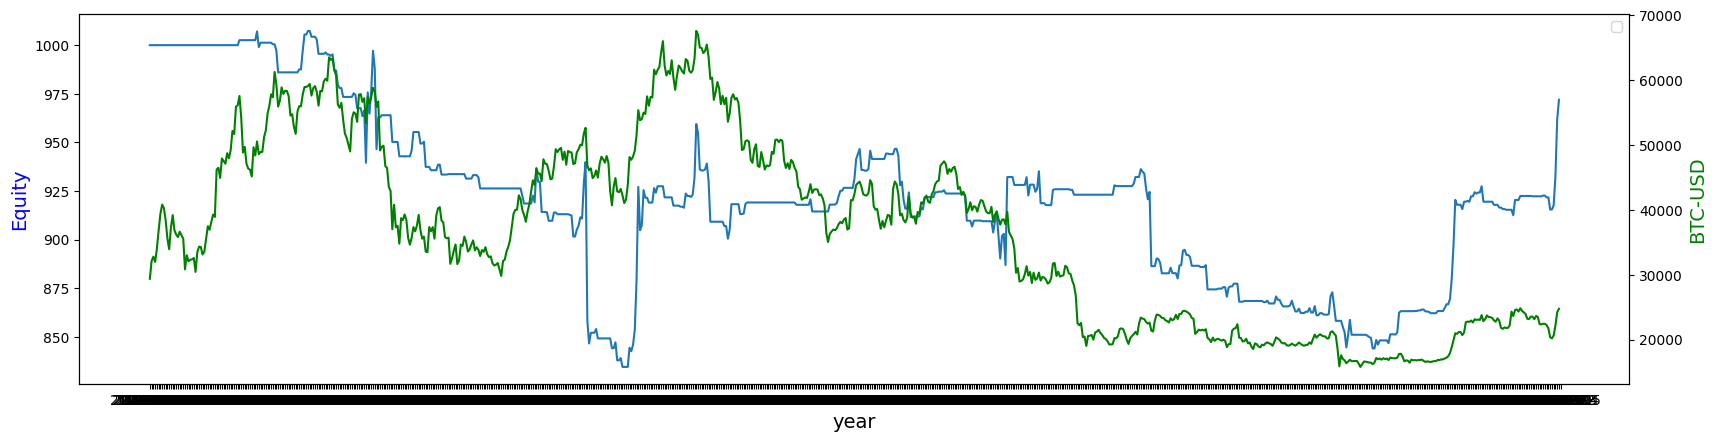

In [103]:
# per_day

fig,ax = plt.subplots()
# make a plot

ax.plot(Y['date'],Y['equity_held'])
# set x-axis label
ax.set_xlabel("year", fontsize = 14)
ax2.xaxis.set_major_locator(md.MonthLocator())
# set y-axis label
ax.set_ylabel("Equity",color="blue",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Y['date'],Y['BTC_price'],color="green")
ax2.set_ylabel("BTC-USD",color="green",fontsize=14)


ax.legend()
fig.set_figwidth(20)
plt.show()

# Update Graph

# Short Strategy

In [40]:
def short_strat(X,total_amt=1000,daily_amt = 100,start_btc=0):
    
    X['bitcoin_held']=start_btc
    X['cash_held']= total_amt
    btc = X.columns.get_loc("Adj Close")
    buy = X.columns.get_loc("Buy_Sell")
    btc_held = X.columns.get_loc("bitcoin_held")
    cash_held = X.columns.get_loc("cash_held")

    for i in range(len(X)):
#         if X.iloc[i,cash_hel
        if X.iloc[i,buy]:
            if X.iloc[i-1,btc_held]<0:
                X.iloc[i,cash_held] = -X.iloc[i-1,btc_held]*X.iloc[i,btc]
                X.iloc[i,btc_held] = 0
            X.iloc[i,btc_held] = X.iloc[i-1,btc_held] + daily_amt/X.iloc[i,btc]
            X.iloc[i,cash_held] = X.iloc[i-1,cash_held] - min(daily_amt,X.iloc[i-1,cash_held])
        else:
            X.iloc[i,cash_held] = X.iloc[i-1,btc_held]*X.iloc[i,btc] + X.iloc[i-1,cash_held] - daily_amt
            X.iloc[i,btc_held] = -min(daily_amt,X.iloc[i-1,cash_held])/X.iloc[i,btc] 

    X['equity_held'] = X['bitcoin_held']*X['Adj Close']+X['cash_held']
    return X

/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = pd.to_datetime(X['date'])
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X['Daily_Average_Sentiment']=df['positive_bert']/df.iloc[:,1:].sum(axis=1)
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

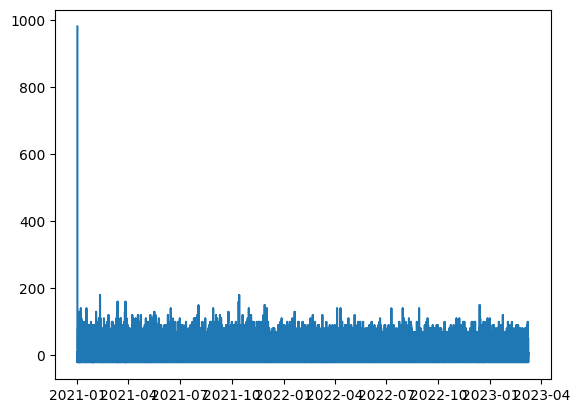

In [84]:
A = data_prep(df,btest)
X_short = short_strat(A,total_amt=1000,daily_amt = 10,start_btc=0)
plt.plot(X_short['date'],X_short['equity_held'])

In [44]:
X

,date,Daily_Average_Sentiment,MA50_Sentiment,MA20_Sentiment,Threshold_50,Threshold_20,Buy_Sell,Adj Close,bitcoin_held,cash_held,equity_held
0,2022-01-01,0.397410,NaN,NaN,False,False,False,47686.812500,-0.000210,990.000000,980.000000
1,2022-01-02,0.390024,NaN,NaN,False,False,False,47345.218750,-0.000211,970.071633,960.071633
2,2022-01-03,0.419594,NaN,NaN,False,False,False,46458.117188,-0.000215,950.259002,940.259002
3,2022-01-04,0.398603,NaN,NaN,False,False,False,45897.574219,-0.000218,930.379657,920.379657
4,2022-01-05,0.368357,NaN,NaN,False,False,False,43569.003906,-0.000230,910.886998,900.886998
...,...,...,...,...,...,...,...,...,...,...,...
176,2022-06-26,0.321051,0.352555,0.341142,False,False,False,21027.294922,0.000760,-26.150003,-10.164127
177,2022-06-27,0.321986,0.351254,0.339868,False,False,False,20735.478516,0.001261,-20.385979,5.764024
178,2022-06-28,0.328778,0.351085,0.339160,False,False,False,20280.634766,0.001005,-4.809590,15.576389
179,2022-06-29,0.340401,0.351037,0.337661,False,True,False,20104.023438,0.000239,5.398860,10.208450


In [24]:
X = data_prep(df,btest)
total_amt = 1000
daily_amt = 100
X['bitcoin_held']=0
X['cash_held']= total_amt
btc = X.columns.get_loc("Adj Close")
buy = X.columns.get_loc("Buy_Sell")
btc_held = X.columns.get_loc("bitcoin_held")
cash_held = X.columns.get_loc("cash_held")

for i in range(len(X)): 
    if X.iloc[i,buy]:
        X.iloc[i,btc_held] = X.iloc[i-1,btc_held] + daily_amt/X.iloc[i,btc]
        X.iloc[i,cash_held] = X.iloc[i-1,cash_held] - daily_amt
    else:
        X.iloc[i,cash_held] = X.iloc[i-1,btc_held]*X.iloc[i,btc] + X.iloc[i-1,cash_held] - daily_amt
        X.iloc[i,btc_held] = -daily_amt/X.iloc[i,btc] 
X
# X['equity_held'] = X['bitcoin_held']*X['Adj Close']+X['cash_held']

/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = pd.to_datetime(X['date'])
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Daily_Average_Sentiment']=df['positive_bert']/df.iloc[:,1:].sum(axis=1)
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_70278/4289246200.py:10: SettingWithCopyWarning: 
A value is trying to be set on a co

,date,Daily_Average_Sentiment,MA50_Sentiment,MA20_Sentiment,Threshold_50,Threshold_20,Buy_Sell,Adj Close,bitcoin_held,cash_held
0,2022-01-01,0.397410,NaN,NaN,False,False,False,47686.812500,-0.002097,900.000000
1,2022-01-02,0.390024,NaN,NaN,False,False,False,47345.218750,-0.002112,700.716327
2,2022-01-03,0.419594,NaN,NaN,False,False,False,46458.117188,-0.002152,502.590015
3,2022-01-04,0.398603,NaN,NaN,False,False,False,45897.574219,-0.002179,303.796571
4,2022-01-05,0.368357,NaN,NaN,False,False,False,43569.003906,-0.002295,108.869977
...,...,...,...,...,...,...,...,...,...,...
176,2022-06-26,0.321051,0.352555,0.341142,False,False,False,21027.294922,-0.004756,-26096.303294
177,2022-06-27,0.321986,0.351254,0.339868,False,False,False,20735.478516,-0.004823,-26294.915496
178,2022-06-28,0.328778,0.351085,0.339160,False,False,False,20280.634766,-0.004931,-26492.721943
179,2022-06-29,0.340401,0.351037,0.337661,False,True,False,20104.023438,-0.004974,-26691.851105


In [18]:
tomerge2 = pd.read_csv('raw_data/data_with_datetime_tomerge2.csv', lineterminator='\n')



FileNotFoundError: [Errno 2] No such file or directory: 'raw_data/data_with_datetime_tomerge2.csv'

In [27]:
!pwd

/Users/suraj/code/giadapi/crypto


In [ ]:
def plot_big(X):
    if X['Threshold']
    